In [1]:
%autosave 0
from __future__ import absolute_import, division, print_function

Autosave disabled


# Fourier Analysis of a Sawtooth Signal

In [2]:
%pylab inline
import scipy.signal

Populating the interactive namespace from numpy and matplotlib


## Creation of the sampled signal

Create a sampled sawtooth signal of 1s length and a frequency of 375 Hz with a sampling rate of 96 kHz:

In [3]:
samplingrate = 96000 # Hz (samples per second)
t = np.linspace(0, 1, samplingrate + 1)

In [4]:
f = 375 # Hz (periods per second)
signal = scipy.signal.sawtooth(2 * numpy.pi * f * t)

Alternatively, create a sine signal or the weighted sum of two sine functions:

In [5]:
# signal = 1.4 * numpy.sin(2 * numpy.pi * 375 * t) + 0.6 * numpy.sin(2 * numpy.pi * 750 * t)

Show the first 4 periods of the signal:

In [6]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)

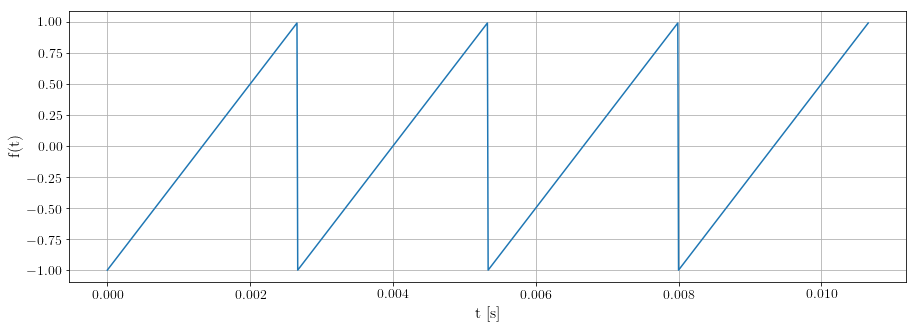

In [7]:
figure(figsize(15,5))
plt.grid()
plt.xlabel('t [s]', fontsize=16)
plt.ylabel('f(t)', fontsize=16)
plt.plot(t[0:4*256], signal[0:4*256]);

Duration of 4 periods: $4 \cdot \frac{1}{375\,\text{Hz}} = 10.\bar{6}\,\text{ms}$

Number of samples per period: $n = \frac{96000\,\text{samples per second}}{375\,\text{periods per second}} = 256\,\text{samples per period}$

## Computation of the Fourier series

We compute the Fourier series for the following non-sampled, periodic function with period length $T$ and frequency $f = \frac{1}{T}$:
$$
  f(t) = \frac{2}{T} \cdot t, \quad -\frac{T}{2} \le t < +\frac{T}{2}
$$

Check the slope:
$$
f(\pm \frac{T}{2}) = \frac{2}{T} \cdot \frac{\pm T}{2} = \pm 1 \quad \checkmark
$$

The sawtooth function is an **odd** function:
$$
f(-t) = -f(t)
$$
Hence, the Fourier coefficients $a_k$ of the cosine terms are all zero:
$$
a_k = 0, \quad k = 1, 2, \ldots
$$

The average of the function over one period is zero. Hence the coefficient $a_0$ is zero:
$$
a_0 = 0
$$

We just have to compute the Fourier coefficients $b_k$ of the sine terms:

$$
\begin{eqnarray*}
b_k 
&=& \frac{2}{T} \int_{-\frac{T}{2}}^\frac{T}{2} f(t) \, \sin(k \cdot \omega \cdot t) \, \mathrm{d}t \\
&=& \frac{2}{T} \int_{-\frac{T}{2}}^\frac{T}{2} \frac{2}{T} \cdot t \cdot \sin\Big(\underbrace{k \cdot \frac{2 \pi}{T}}_a \cdot t\Big) \, \mathrm{d}t \\
\end{eqnarray*}
$$

To compute this integral, we need:
$$
  \int x \sin(a x) \, \mathrm{d}x = \frac{1}{a^2} \sin(a x) - \frac{1}{a} x \cos(ax)
$$
Check that the derivative of the right hand side is actually the argument of the integral!

Then the value of the integral is:
$$
\begin{eqnarray*}
b_k 
&=& \frac{2}{T} \int_{-\frac{T}{2}}^\frac{T}{2} \frac{2}{T} \cdot t \cdot \sin\Big(\underbrace{\frac{2 k \pi}{T}}_a \cdot t\Big) \, \mathrm{d}t \\
&=& \frac{4}{T^2} \Bigg[ \frac{T^2}{4  k^2 \pi^2} \sin\left(\frac{2 k \pi}{T} t\right) - \frac{T}{2 k \pi} t \cos\left( \frac{2 k \pi}{T} t \right) \Bigg]_{-\frac{T}{2}}^{+\frac{T}{2}}
\end{eqnarray*}
$$

If you insert the upper and lower limit ($\pm \frac{T}{2}$) in the antiderivative for $t$, you get for the sine function:
$$
\sin \Big(\frac{2 k \pi}{T} \cdot \frac{\pm T}{2}\Big) = \sin(\pm k\pi) = 0
$$

As the term $t \cos \Big( \frac{2 k \pi}{T} t \Big)$ is an odd function (the product of an odd function, $t$, and an even function, $\cos(t)$, is an odd function), the value of $b_k$ is:
$$
\begin{eqnarray}
b_k 
&=& \frac{4}{T^2} \cdot 2 \cdot \Bigg( -\frac{T}{2 k \pi} \cdot \frac{T}{2} \cdot \underbrace{\cos \left( \frac{2 k \pi}{T} \cdot \frac{T}{2} \right)}_{\cos(k \pi) = \pm 1} \Bigg) \\
&=& \frac{2}{k \pi} \cdot (-1)^{k+1}
\end{eqnarray}
$$

We are interested how "strong" a certain frequency $f_k = k \cdot f = k \cdot \frac{1}{T}$ is. Thus, we take the absolute values $|b_k|$:
$$
|b_k| = \frac{2}{k\pi} = \frac{2}{\pi} \cdot \frac{f}{f_k}
$$

## Computation of the Discrete Fourier Transform (DFT)

The DFT produces an $n$-periodic sequence of complex numbers:

$$
F_\mu = \sum_{j=0}^{n-1} f_j \cdot e^{-\mathrm{i} \mu \frac{2 \pi}{n} j}, \qquad \mu \in \mathbb{Z}
$$

Compute the DFT of exactly one period to avoid artifacts:

In [8]:
n = 256 # power of 2
n2 = int(n / 2)
dft = numpy.fft.fft(signal[0:n])

For implementation details, please see: https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.fft.html#module-numpy.fft

**`dft[0]`**: zero-frequency term, i.e., the sum of the signal; always purely real for real inputs <br>
    **`dft[1:n/2]`**: $(n/2 - 1) = 127$ positive-frequency terms, in order of increasing frequency ($f, 2\cdot f, \ldots, 126 \cdot f, 127 \cdot f$) <br>
**`dft[n/2]`**: for an even number of input points, represents both positive and negative Nyquist frequency ($\pm 128 \cdot 375\,\mathsf{Hz} = \pm 48\,\mathsf{kHz}$) ; purely real for real input <br>
**`dft[n/2+1:]`**: $(n/2 - 1) = 127$ negative-frequency terms, in order of decreasingly negative frequency ($-127\cdot f, -126\cdot f, \ldots, -2\cdot f, -f$)

### Visualization

Plot the Fourier coefficients $|b_k|$ and $|c_k| + |c_{-k}| = 2 \cdot |c_k|$ for $k = 1, 2, \ldots, 128$ (excluding the offset $c_0$):

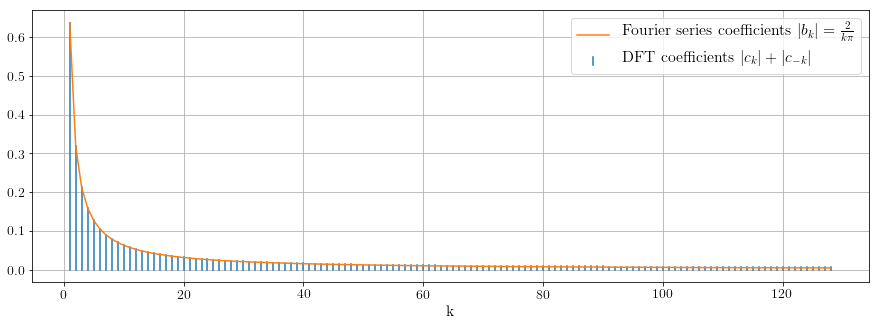

In [9]:
figure(figsize(15,5)) 
plt.grid();
plt.xlabel('k', fontsize=16);
k = numpy.linspace(1, n2, n2)
plt.stem(k, 2 * numpy.abs(dft[1:n2 + 1]) / n, markerfmt=' ', basefmt=' ');
plt.plot(k, 2 / (k * numpy.pi), color=plt.cm.tab10(1))
plt.legend([r"Fourier series coefficients $|b_k| = \frac{2}{k \pi}$", 
            r"DFT coefficients $|c_k| + |c_{-k}| $"], loc='upper right', fontsize=16);

For a better comparison of DFT coefficients $|c_k|$ and Fourier series coefficients $|b_k|$, the coefficients $|b_k|$ are visualized with an interpolating (orange) line. Be aware that the coefficients $b_k$ are a series of discrete values, too!

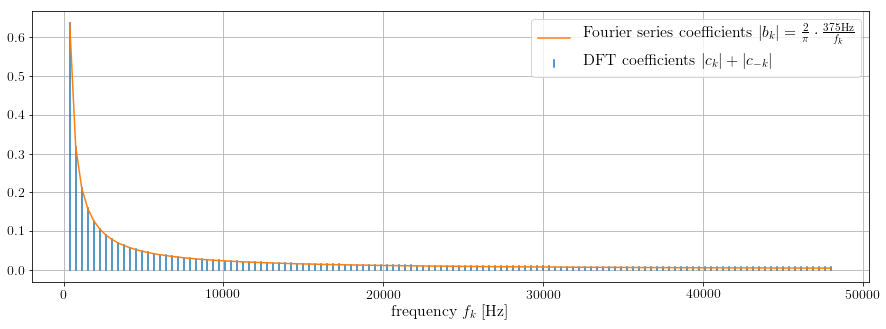

In [10]:
figure(figsize(15,5))
plt.grid();
plt.xlabel('frequency $f_k$ [Hz]', fontsize=16);
freq = numpy.abs(np.fft.fftfreq(n) * samplingrate)[1:n2 + 1]
plt.stem(freq, 2 * numpy.abs(dft[1:n2 + 1]) / n, markerfmt=' ', basefmt=' ');
plt.plot(freq, 2 * f / (numpy.pi * freq), color=plt.cm.tab10(1))
plt.legend([r"Fourier series coefficients $|b_k| = \frac{2}{\pi} \cdot \frac{375\,\mathrm{Hz}}{f_k}$", 
            r"DFT coefficients $|c_k| + |c_{-k}|$"], loc='upper right', fontsize=16);

### Sanity check

If the input is real, $c_k \stackrel{!}{=} \bar{c}_{-k}$, $k = 1, 2, \ldots, \frac{n}{2}$.

In [11]:
dft_posfreq = dft[1:n2 + 1] # positive frequency terms
dft_negfreq = dft[-1:-(n2 + 1):-1] # negative frequency terms; reverse order

In [12]:
for k, posfreq, negfreq in zip(numpy.arange(1, len(dft_posfreq)+1), dft_posfreq, dft_negfreq):
    diff = posfreq - numpy.conjugate(negfreq)
    if numpy.abs(diff) > 1e-10:
        print('c_{0} is not the complex conjugate of c_-{0}'.format(k))

### Inverse Discrete Fourier Transform

Reconstruct one period of the signal:

In [13]:
signal_recon = numpy.fft.ifft(dft)

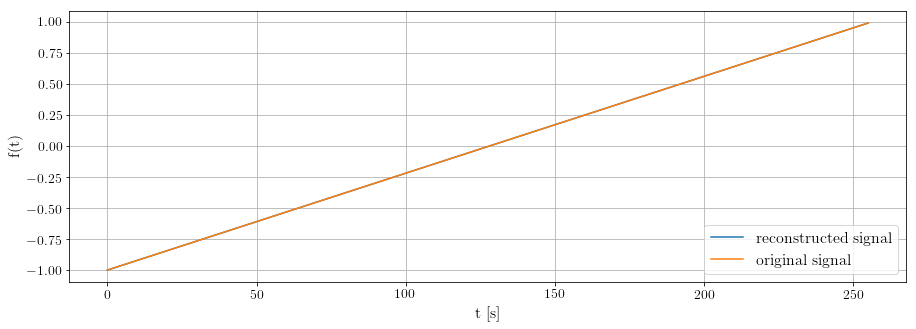

In [14]:
figure(figsize(15,5))
plt.grid()
plt.xlabel('t [s]', fontsize=16)
plt.ylabel('f(t)', fontsize=16)
t = numpy.arange(n)
plt.plot(t[0:n], numpy.real(signal_recon))
plt.plot(t[0:n], signal[0:n])
plt.legend([r"reconstructed signal", r"original signal"], loc='lower right', fontsize=16);

The return type is numpy.complex128, but the values are actually real:

In [15]:
numpy.all(numpy.abs(numpy.imag(signal_recon)) < 1e-10)

True

The original signal and the reconstructed signal are identical:

In [16]:
numpy.all(numpy.abs(numpy.real(signal_recon) - signal[0:n]) < 1e-10)

True

## Low-pass filtering

Analyze 4 periods for a better visualization:

In [17]:
n = 4*256 # power of 2
n2 = int(n / 2)
dft = numpy.fft.fft(signal[0:n])

**Note:** 3 out of 4 coefficients are zero! Why?

In [18]:
numpy.abs(dft[1:17]) < 1e-10

array([ True,  True,  True, False,  True,  True,  True, False,  True,
        True,  True, False,  True,  True,  True, False], dtype=bool)

Set the high frequency coefficients to zero:

In [19]:
b = 4*16
dft[b+1:n2 + 1] = 0
dft[-b-1:-(n2 + 1):-1] = 0

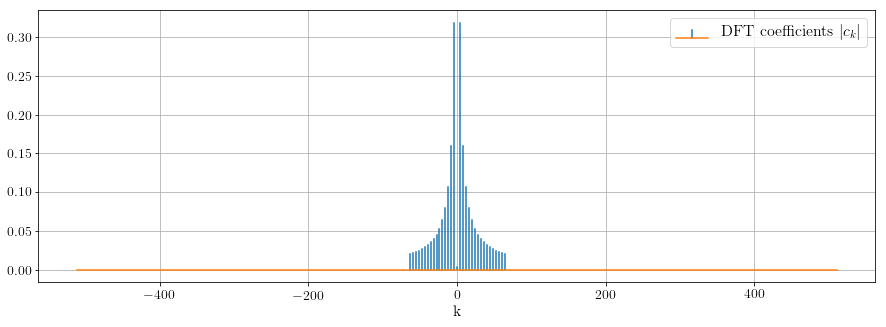

In [20]:
figure(figsize(15,5)) 
plt.grid();
plt.xlabel('k', fontsize=16);
k = numpy.linspace(-n2, n2, n)
(markerline, stemlines, baseline) = plt.stem(k, numpy.abs(numpy.fft.fftshift(dft)) / n, markerfmt=' ');
plt.setp(baseline, 'color', plt.cm.tab10(1))
plt.legend([r"DFT coefficients $|c_k|$"], loc='upper right', fontsize=16);

**Inverse DFT:**

In [21]:
signal_recon = numpy.fft.ifft(dft)

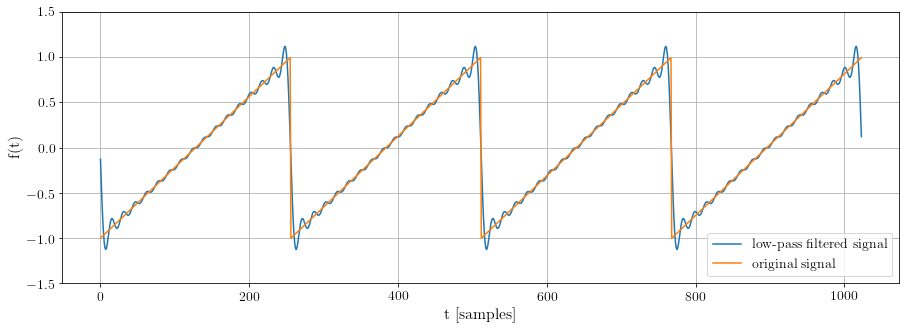

In [22]:
figure(figsize(15,5))
plt.grid()
plt.xlabel('t [samples]', fontsize=16)
plt.ylabel('f(t)', fontsize=16)
plt.ylim((-1.5,1.5))
t = numpy.arange(n)
plt.plot(t, numpy.real(signal_recon));
plt.plot(t, signal[0:n])
plt.legend([r"low-pass filtered signal", r"original signal"], loc='lower right', fontsize=14);